In [82]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import sem, t
from scipy import mean

In [83]:
X_train = np.load('madelon/train-X.npy')
y_train = np.load('madelon/train-y.npy')
X_test = np.load('madelon/test-X.npy')
y_test = np.load('madelon/test-y.npy')

train_X0 = np.load('madelon/cv-train-X.0.npy')
train_X1 = np.load('madelon/cv-train-X.1.npy')
train_X2 = np.load('madelon/cv-train-X.2.npy')
train_X3 = np.load('madelon/cv-train-X.3.npy')
train_X4 = np.load('madelon/cv-train-X.4.npy')

train_y0 = np.load('madelon/cv-train-y.0.npy')
train_y1 = np.load('madelon/cv-train-y.1.npy')
train_y2 = np.load('madelon/cv-train-y.2.npy')
train_y3 = np.load('madelon/cv-train-y.3.npy')
train_y4 = np.load('madelon/cv-train-y.4.npy')

heldout_X0 = np.load('madelon/cv-heldout-X.0.npy')
heldout_X1 = np.load('madelon/cv-heldout-X.1.npy')
heldout_X2 = np.load('madelon/cv-heldout-X.2.npy')
heldout_X3 = np.load('madelon/cv-heldout-X.3.npy')
heldout_X4 = np.load('madelon/cv-heldout-X.4.npy')

heldout_y0 = np.load('madelon/cv-heldout-y.0.npy')
heldout_y1 = np.load('madelon/cv-heldout-y.1.npy')
heldout_y2 = np.load('madelon/cv-heldout-y.2.npy')
heldout_y3 = np.load('madelon/cv-heldout-y.3.npy')
heldout_y4 = np.load('madelon/cv-heldout-y.4.npy')

In [84]:
# 2(a) Training Classifiers
# Algorithms
# (i) SGD

model_1 = SGDClassifier(loss = 'log', max_iter = 10000)
model_1 = model_1.fit(X_train, y_train)

In [85]:
#(ii) Decision Tree

model_2 = DecisionTreeClassifier(criterion = 'entropy')
model_2 = model_2.fit(X_train, y_train)

In [86]:
#(iii) Decision Stump of Depth 4 

model_3 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
model_3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [87]:
#(iv) Decision Stumps as Features

# function below could randomly select half features from train and test data set.
def random_choose_half(train_set, test_set):
    # save the length of the train data
    length = len(train_set)
    # concatenate the train data and the test data
    train_and_test = np.concatenate((train_set, test_set))
    # change array to dataframe
    data_df = pd.DataFrame(data = train_and_test)
    # get the 50% data randomly
    data_df_random = data_df.sample(frac = 0.5, axis = 1)
    # convert the 2000*250 dataframe to a list whose length is 2000
    X_list = []
    X_list = data_df_random.values.tolist()
    # convert the list to numpy array
    X_train_array = np.array(X_list)[:length]
    X_test_array = np.array(X_list)[length:]
    return X_train_array, X_test_array



In [88]:
# get the half-feature data set
X_train_array, X_test_array = random_choose_half(X_train, X_test)

label_list = []
label_list_test = []

# repeat 50 times for new feature matrix
for i in range(0, 50):
    
    # concatenate the train data and test data together
    whole_data = np.concatenate((X_train, X_test))
    # change array to the dataframe
    data_df = pd.DataFrame(data = whole_data)

    # get the 50% data randomly
    data_df_random = data_df.sample(frac = 0.5, axis = 1)

    # convert the 2000*250 dataframe to a list whose length is 2000
    X_list = []
    X_list = data_df_random.values.tolist()

    # convert the list to numpy array
    X_train_array = np.array(X_list)[:2000]
    X_test_array = np.array(X_list)[2000:]
    y_array = np.array(y_train)
    y_array_test = np.array(y_test)

    # train a classfier for this 50% part of data 
    #model_4 = DecisionTreeClassifier(criterion = "entropy",max_depth = 4)
    model_4 = model_3.fit(X_train_array, y_array)
    model_5 = model_3.fit(X_test_array, y_array_test)


    # use this classifier to test the whole data set
    label_list.append(model_4.predict(X_train_array)) 
    label_list_test.append(model_5.predict(X_test_array))

# transpose the train array and test array to correct shape
train_array = np.asarray(label_list)
train_trans_array = train_array.transpose()

test_array = np.asarray(label_list_test)
test_trans_array = test_array.transpose()

# train the final model by this 2000* 50 new dataset and the original label
SGD_clf = linear_model.SGDClassifier()
final_SGD = SGD_clf.fit(train_trans_array, y_train)

# predict labels for test data
final_SGD.predict(test_trans_array)






array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,

In [89]:
# Evaluation: Crossing-Validation
# Some useful functions and data

# put all the data into the list
list_trainX = [train_X0, train_X1, train_X2, train_X3, train_X4]
list_trainy = [train_y0, train_y1, train_y2, train_y3, train_y4]
list_heldoutX = [heldout_X0, heldout_X1, heldout_X2, heldout_X3, heldout_X4]
list_heldouty = [heldout_y0, heldout_y1, heldout_y2, heldout_y3, heldout_y4]

# function below which could get the accurancy 
def accuracy(train_X, train_y, heldout_X, heldout_y, classifier):

    # train the classifier by using the train_set
    classifier = classifier.fit(train_X, train_y)
    
    # get the label tested from predicting
    true_y = classifier.predict(heldout_X)
    
    #calculate the accurancy of heldout data
    accuracy_heldout = accuracy_score(heldout_y, true_y)  # accuracy = accuracy_score(prediction, labels_test)
    
    # calculate the accuracy of train data
    true_y_train = classifier.predict(train_X)
    accuracy_train = accuracy_score(train_y, true_y_train)
    return accuracy_heldout, accuracy_train

# function below which could get the average accurancy 
def average_accuracy(trainX, trainy, heldoutX, heldouty, classifier):
    accuracy_train_SGD = []
    accuracy_heldout_SGD = []
    for i in range(0,5):
        accuracy_train_SGD.append(accuracy(list_trainX[i], list_trainy[i], list_heldoutX[i], list_heldouty[i], classifier)[1])
        accuracy_heldout_SGD.append(accuracy(list_trainX[i], list_trainy[i], list_heldoutX[i], list_heldouty[i], classifier)[0])        
    return accuracy_train_SGD, accuracy_heldout_SGD

# function below which could get the confidence_interval
def confidence_interval(data):
    confidence = 0.95

    n = len(data)
    m = mean(data)
    std_err = sem(data)
    h = std_err * t.ppf((1 + confidence) / 2, n - 1)
    

    start = m - h
    end = m + h
    return start, end


In [90]:
# for SGDClassifier
accuracy_train_SGD, accuracy_heldout_SGD = average_accuracy(list_trainX, list_trainy, list_heldoutX, list_heldouty, classifier = linear_model.SGDClassifier())

# for average train accuracy
accur_sum = 0
for i in accuracy_train_SGD:
    accur_sum += i
accur_train_SGD = accur_sum / 5
print("Average train accuracy of SGD model:" + str(accur_train_SGD))

# for average heldout accuracy
accur_sum = 0
for i in accuracy_heldout_SGD:
    accur_sum += i
accur_heldout_SGD = accur_sum / 5
print("Average heldout accuracy of SGD model:" + str(accur_heldout_SGD))

# for standard deviation of SGD
std_SGD_train = np.std(accuracy_train_SGD, dtype=np.float64)
print("Standard deviation of SGD_train:" + str(std_SGD_train))
std_SGD_heldout = np.std(accuracy_heldout_SGD, dtype=np.float64)
print("Standard deviation of SGD heldout" + str(std_SGD_heldout))

# for confidence intervals of SGD
confidence_interval_train_SGD = confidence_interval(accuracy_train_SGD)
confidence_interval_heldout_SGD = confidence_interval(accuracy_heldout_SGD)
print("Confidence intervals of SGD train:" + str(confidence_interval_train_SGD))
print("Confidence intervals of SGD heldout:" + str(confidence_interval_heldout_SGD))

Average train accuracy of SGD model:0.54775
Average heldout accuracy of SGD model:0.5075000000000001
Standard deviation of SGD_train:0.05894462443683901
Standard deviation of SGD heldout0.016124515496597117
Confidence intervals of SGD train:(0.4659217430023079, 0.6295782569976921)
Confidence intervals of SGD heldout:(0.4851155839378935, 0.5298844160621066)


In [91]:
#for DTClassifier
accuracy_train_DT, accuracy_heldout_DT = average_accuracy(list_trainX, list_trainy, list_heldoutX, list_heldouty, classifier = DecisionTreeClassifier(criterion = 'entropy'))

#for average train accuracy
accur_sum = 0
for i in accuracy_train_DT:
    accur_sum += i
accur_train_DT = accur_sum / 5
print("Average train accuracy of DT model:" + str(accur_train_DT))

# for average heldout accuracy
accur_sum = 0
for i in accuracy_heldout_DT:
    accur_sum += i
accur_heldout_DT = accur_sum / 5
print("Average heldout accuracy of DT model:" + str(accur_heldout_DT))

# for standard deviation
std_DT_train = np.std(accuracy_train_DT, dtype=np.float64)
print("Standard deviation of DT train:" + str(std_DT_train))
std_DT_heldout = np.std(accuracy_heldout_DT, dtype=np.float64)
print("Standard deviation of DT heldout:" + str(std_DT_heldout))

# for confidence intervals 
confidence_interval_train_DT = confidence_interval(accuracy_train_DT)
confidence_interval_heldout_DT = confidence_interval(accuracy_heldout_DT)
print("Confidence intervals of DT train:" + str(confidence_interval_train_DT))
print("Confidence intervals of DT heldout:" + str(confidence_interval_heldout_DT))

Average train accuracy of DT model:1.0
Average heldout accuracy of DT model:0.766
Standard deviation of DT train:0.0
Standard deviation of DT heldout:0.02452549693686147
Confidence intervals of DT train:(1.0, 1.0)
Confidence intervals of DT heldout:(0.7319531520385537, 0.8000468479614463)


In [92]:
# for DT4Classifier
accuracy_train_DT4, accuracy_heldout_DT4 = average_accuracy(list_trainX, list_trainy, list_heldoutX, list_heldouty, classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4))

#for average train accuracy
accur_sum = 0
for i in accuracy_train_DT4:
    accur_sum += i
accur_train_DT4 = accur_sum / 5
print("Average train accuracy of DT4 model:" + str(accur_train_DT4))

# for average heldout accuracy
accur_sum = 0
for i in accuracy_heldout_DT4:
    accur_sum += i
accur_heldout_DT4 = accur_sum / 5
print("Average heldout accuracy of DT4 model:" + str(accur_heldout_DT4))

# for standard deviation
std_DT4_train = np.std(accuracy_train_DT4, dtype=np.float64)
print("Standard deviation of DT4 train:" + str(std_DT4_train))
std_DT4_heldout = np.std(accuracy_heldout_DT4, dtype=np.float64)
print("Standard deviation of DT4 heldout:" + str(std_DT4_heldout))

# for confidence intervals 
confidence_interval_train_DT4 = confidence_interval(accuracy_train_DT4)
confidence_interval_heldout_DT4 = confidence_interval(accuracy_heldout_DT4)
print("Confidence intervals of DT4 train:" + str(confidence_interval_train_DT4))
print("Confidence intervals of DT4 heldout:" + str(confidence_interval_heldout_DT4))

Average train accuracy of DT4 model:0.78325
Average heldout accuracy of DT4 model:0.7649999999999999
Standard deviation of DT4 train:0.011801747751922166
Standard deviation of DT4 heldout:0.016046806535881215
Confidence intervals of DT4 train:(0.7668665476106983, 0.7996334523893017)
Confidence intervals of DT4 heldout:(0.7427234612696982, 0.7872765387303016)


In [93]:
# for "decision stumps as features" Classifier (called "DSF" below)
# new dataset
train_X0_half, heldout_X0_half = random_choose_half(train_X0, heldout_X0)
train_X1_half, heldout_X1_half = random_choose_half(train_X1, heldout_X1)
train_X2_half, heldout_X2_half = random_choose_half(train_X2, heldout_X2)
train_X3_half, heldout_X3_half = random_choose_half(train_X3, heldout_X3)
train_X4_half, heldout_X4_half = random_choose_half(train_X4, heldout_X4)
list_trainX = [train_X0_half, train_X1_half, train_X2_half, train_X3_half, train_X4_half]
list_trainy = [train_y0, train_y1, train_y2, train_y3, train_y4]
list_heldoutX = [heldout_X0_half, heldout_X1_half, heldout_X2_half, heldout_X3_half, heldout_X4_half]
list_heldouty = [heldout_y0, heldout_y1, heldout_y2, heldout_y3, heldout_y4]


accuracy_train_half, accuracy_heldout_half = average_accuracy(list_trainX, list_trainy, list_heldoutX, list_heldouty, classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4))

#for average train accuracy
accur_sum = 0
for i in accuracy_train_half:
    accur_sum += i
accur_train_half = accur_sum / 5
print("Average train accuracy of DSF:" + str(accur_train_half))

# for average heldout accuracy
accur_sum = 0
for i in accuracy_heldout_half:
    accur_sum += i
accur_heldout_half = accur_sum / 5
print("Average heldout accuracy of DSF:" + str(accur_heldout_half))

# for standard deviation
std_half_train = np.std(accuracy_train_half, dtype=np.float64)
print("Standard deviation of DSF train:" + str(std_half_train))
std_half_heldout = np.std(accuracy_heldout_half, dtype=np.float64)
print("Standard deviation of DSF heldout:" + str(std_half_heldout))

# for confidence intervals
confidence_interval_train_half = confidence_interval(accuracy_train_half)
confidence_interval_heldout_half = confidence_interval(accuracy_heldout_half)
print("Confidence intervals of DSF train:" + str(confidence_interval_train_half))
print("Confidence intervals of DSF heldout:" + str(confidence_interval_heldout_half))

Average train accuracy of DSF:0.780625
Average heldout accuracy of DSF:0.7475
Standard deviation of DSF train:0.012443622864744807
Standard deviation of DSF heldout:0.02302172886644268
Confidence intervals of DSF train:(0.763350482103126, 0.7978995178968741)
Confidence intervals of DSF heldout:(0.7155407167877872, 0.7794592832122129)


In [94]:
# Evaluation: Testing
# for SGD 
acc_test_SGD = accuracy(X_train, y_train, X_test, y_test, model_1)[0]
print("accuracy of SGD model for test data: " + str(acc_test_SGD))

# for DT
acc_test_DT = accuracy(X_train, y_train, X_test, y_test, model_2)[0]
print("accuracy of DT model for test data: " + str(acc_test_DT))

# for DT4
acc_test_DT4 = accuracy(X_train, y_train, X_test, y_test, model_3)[0]
print("accuracy of DT4 model for test data: " + str(acc_test_DT4))

# for half_model
acc_test_DSF = accuracy(X_train, y_train, X_test, y_test, final_SGD)[0]
print("accuracy of DSF model for test data: " + str(acc_test_DSF))

accuracy of SGD model for test data: 0.54
accuracy of DT model for test data: 0.775
accuracy of DT4 model for test data: 0.7516666666666667
accuracy of DSF model for test data: 0.5033333333333333


In [95]:
import os
import matplotlib.pyplot as plt


def plot_results(accur_train_SGD, accur_heldout_SGD, std_SGD_train, std_SGD_heldout, acc_test_SGD, accur_DT_train,
                 accur_DT_heldout, std_DT_train, std_DT_heldout, acc_test_DT, accur_DT4_train, accur_DT4_heldout,
                 std_DT4_train, std_DT4_heldout, acc_test_DT4, accur_train_half, accur_heldout_half, std_half_train, std_half_heldout, acc_test_DSF):
    """
    Plots the final results from problem 2. For each of the 4 classifiers, pass
    the training accuracy, training standard deviation, held-out accuracy, held-out
    standard deviation, and testing accuracy.

    Although it should not be necessary, feel free to edit this method.
    """
    train_x_pos = [0, 4, 8, 12]
    cv_x_pos = [1, 5, 9, 13]
    test_x_pos = [2, 6, 10, 14]
    ticks = cv_x_pos

    labels = ['sgd', 'dt', 'dt4', 'stumps (2000 x 50)']

    train_accs = [accur_train_SGD, accur_DT_train, accur_DT4_train, accur_train_half]
    train_errors = [std_SGD_heldout, std_DT_train, std_DT4_train, std_half_train]

    cv_accs = [accur_heldout_SGD, accur_DT_heldout, accur_DT4_heldout, accur_heldout_half]
    cv_errors = [std_SGD_heldout, std_DT_heldout, std_DT4_heldout, std_half_heldout]

    test_accs = [acc_test_SGD, acc_test_DT, acc_test_DT4, acc_test_DSF]

    fig, ax = plt.subplots()
    ax.bar(train_x_pos, train_accs, yerr=train_errors, align='center', alpha=0.5, ecolor='black', capsize=10, label='train')
    ax.bar(cv_x_pos, cv_accs, yerr=cv_errors, align='center', alpha=0.5, ecolor='black', capsize=10, label='held-out')
    ax.bar(test_x_pos, test_accs, align='center', alpha=0.5, capsize=10, label='test')
    ax.set_ylabel('Accuracy')
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels)
    ax.set_title('Models')
    ax.yaxis.grid(True)
    ax.legend()
    plt.tight_layout()

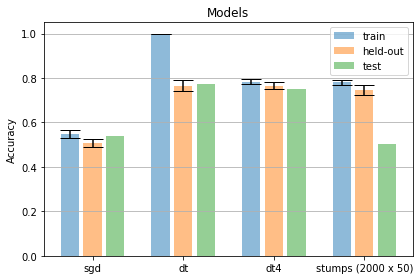

In [96]:
plot_results(accur_train_SGD, accur_heldout_SGD, std_SGD_train, std_SGD_heldout, acc_test_SGD, accur_train_DT,
                 accur_heldout_DT, std_DT_train, std_DT_heldout, acc_test_DT, accur_train_DT4, accur_heldout_DT4,
                 std_DT4_train, std_DT4_heldout, acc_test_DT4, accur_train_half, accur_heldout_half, std_half_train, std_half_heldout, acc_test_DSF)

In [97]:
import numpy as np


# When you turn this function in to Gradescope, it is easiest to copy and paste this cell to a new python file called hw1.py
# and upload that file instead of the full Jupyter Notebook code (which will cause problems for Gradescope)
def compute_features(names):
    """
    Given a list of names of length N, return a numpy matrix of shape (N, 260)
    with the features described in problem 2b of the homework assignment.
    
    Parameters
    ----------
    names: A list of strings
        The names to featurize, e.g. ["albert einstein", "marie curie"]
    
    Returns
    -------
    numpy.array:
        A numpy array of shape (N, 260)
    """
    N = len(names)
    a= np.zeros((N, 260))
    name_order = 0
    
    for name in names:
        first_name = name.split(" ")[0]
        last_name = name.split(" ")[1]
        first_len = len(first_name)
        last_len = len(last_name)
        
        char_order = 0
        if first_len >= 5 and last_len >= 5:
            name_total = first_name[0:5] + last_name[0:5]
        elif first_len < 5 and last_len >= 5:
            name_total = first_name[0:first_len] + "0"*(5 - first_len) + last_name[0:5]
        elif first_len >= 5 and last_len < 5:
            name_total = first_name[0:5] + last_name[0:5] + "0"*(5 - last_len) 
        else:
            name_total = first_name[0: first_len] + "0" * (5 - first_len) + last_name[0:last_len] + "0" *(5 - last_len)
        
        
        for char in name_total:
            if char.isupper():
                insert_one_place = ord(char) - 64
                a[name_order][26 * char_order + insert_one_place - 1] = 1
                
            elif char.islower():
                insert_one_place = ord(char) - 96
                a[name_order][26 * char_order + insert_one_place - 1] = 1
            else:
                pass
          
            char_order += 1
     
        name_order += 1
    return a
   
    

In [98]:
# get the required data for Badges Game
with open('Badges/train.names.txt') as fin:
    train_name = fin.readlines()
for i in train_name:
    i = i.strip()
    
train_label = np.load('Badges/train.labels.npy')

with open('Badges/test.names.txt') as fin:
    test_name = fin.readlines()

test_label = np.load('Badges/test.labels.npy')
with open('Badges/hidden-test.names.txt') as fin:
    hidden_name = fin.readlines()



In [99]:
# get the feature extraction
train_data = compute_features(train_name)
test_data = compute_features(test_name)
hidden_data = compute_features(hidden_name)

# SGD
accuracy_test_1, accuracy_train_1 = accuracy(train_data, train_label, test_data, test_label, model_1)
print("SGD: accuracy for test data: " + str(accuracy_test_1) + " for train data: " + str(accuracy_train_1))

# DT
accuracy_test_2, accuracy_train_2 = accuracy(train_data, train_label, test_data, test_label, model_2)
print("DT: accuracy for test data: " + str(accuracy_test_2) + " for train data: " + str(accuracy_train_2))

# DT4
accuracy_test_3, accuracy_train_3 = accuracy(train_data, train_label, test_data, test_label, model_3)
print("DT4: accuracy for test data: " + str(accuracy_test_3) + " for train data: " + str(accuracy_train_3))

# DSF
accuracy_test_4, accuracy_train_4 = accuracy(train_data, train_label, test_data, test_label, final_SGD)
print("DSF: accuracy for test data: " + str(accuracy_test_4) + " for train data: " + str(accuracy_train_4))



SGD: accuracy for test data: 0.631 for train data: 0.747
DT: accuracy for test data: 0.623 for train data: 1.0
DT4: accuracy for test data: 0.65 for train data: 0.677
DSF: accuracy for test data: 0.641 for train data: 0.756


In [100]:
# extra credit
def compute_new_features(names):
    """
    Given a list of names of length N, return a numpy matrix of shape (N, 20)
    with the features about whether this letter is vowel.
    
    Parameters
    ----------
    names: A list of strings
        The names to featurize, e.g. ["albert einstein", "marie curie"]
    
    Returns
    -------
    numpy.array:
        A numpy array of shape (N, 20)
    """
    N = len(names)
    a= np.zeros((N, 20))
    name_order = 0
    vowels_list = ['a', 'e', 'i', 'o', 'u']
    
    for name in names:
        first_name = name.split(" ")[0]
        last_name = name.split(" ")[1]
        first_len = len(first_name)
        last_len = len(last_name)
        
        char_order = 0
        if first_len >= 10 and last_len >= 10:
            name_total = first_name[0:10] + last_name[0:10]
        elif first_len < 10 and last_len >= 10:
            name_total = first_name[0:first_len] + "0"*(10 - first_len) + last_name[0:10]
        elif first_len >= 10 and last_len < 10:
            name_total = first_name[0:10] + last_name[0:5] + "0"*(10 - last_len) 
        else:
            name_total = first_name[0: first_len] + "0" * (10 - first_len) + last_name[0:last_len] + "0" *(10 - last_len)
        
        
        for char in name_total:
            if char in vowels_list:
                a[name_order][char_order] = 1
          
            else:
                a[name_order][char_order] = 0
          
            char_order += 1
     
        name_order += 1
    return a
   
    

In [101]:
# get the feature extraction
train_data = compute_new_features(train_name)
test_data = compute_new_features(test_name)
hidden_data = compute_new_features(hidden_name)

# ???? need a new model or base on trained model ?????
# SGD
accuracy_test_1, accuracy_train_1 = accuracy(train_data, train_label, test_data, test_label, model_1)
print("SGD: accuracy for test data: " + str(accuracy_test_1) + " for train data: " + str(accuracy_train_1))

# DT
accuracy_test_2, accuracy_train_2 = accuracy(train_data, train_label, test_data, test_label, model_2)
print("DT: accuracy for test data: " + str(accuracy_test_2) + " for train data: " + str(accuracy_train_2))

# DT4
accuracy_test_3, accuracy_train_3 = accuracy(train_data, train_label, test_data, test_label, model_3)
print("DT4: accuracy for test data: " + str(accuracy_test_3) + " for train data: " + str(accuracy_train_3))

# DSF
accuracy_test_4, accuracy_train_4 = accuracy(train_data, train_label, test_data, test_label, final_SGD)
print("DSF: accuracy for test data: " + str(accuracy_test_4) + " for train data: " + str(accuracy_train_4))


SGD: accuracy for test data: 0.698 for train data: 0.638
DT: accuracy for test data: 0.828 for train data: 1.0
DT4: accuracy for test data: 0.65 for train data: 0.66
DSF: accuracy for test data: 0.664 for train data: 0.672


In [102]:
#  extra credit

hidden_label = model_2.predict(hidden_data)
print(hidden_label)

import numpy as np
np.savetxt("labels.txt", hidden_label, fmt="%s")


[0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0
 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0
 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0
 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 1 0 1 1 0 1 1 0 1 1 0 